<a href="https://colab.research.google.com/github/npthg/test-data-tf/blob/master/test_data_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

In [ ]:
import pandas as pd


In [ ]:
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/fake_reg.csv');

In [ ]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


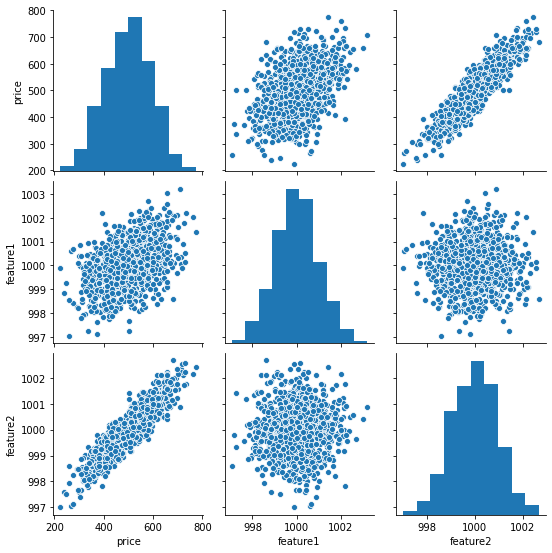

In [ ]:
sns.pairplot(df)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['feature1', 'feature2']].values

In [ ]:
y = df['price'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
X_train = scaler.transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential([Dense(4,activation='relu'),
                    Dense(4, activation='relu'),
                    Dense(1)])

In [ ]:
model.compile(optimizer='rmsprop', loss='mse')

In [ ]:
model.fit(x=X_train, y=y_train, epochs=250)

Epoch 1/250
22/22 [==============================] - 0s 1ms/step - loss: 256716.8750
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 256671.3594
Epoch 3/250
22/22 [==============================] - 0s 957us/step - loss: 256615.7969
Epoch 4/250
22/22 [==============================] - 0s 943us/step - loss: 256551.3906
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 256475.4062
Epoch 6/250
22/22 [==============================] - 0s 1ms/step - loss: 256386.2812
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 256284.1562
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 256169.7812
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 256043.1094
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 255901.1719
Epoch 11/250
22/22 [==============================] - 0s 971us/step - loss: 255737.4375
Epoch 12/250
22/22 [==============================] - 0s 

In [ ]:
loss_df = pd.DataFrame(model.history.history)

In [ ]:
loss_dfb

,loss
0,256716.875000
1,256671.359375
2,256615.796875
3,256551.390625
4,256475.406250
...,...
245,230.797119
246,221.750046
247,213.157593
248,204.674881


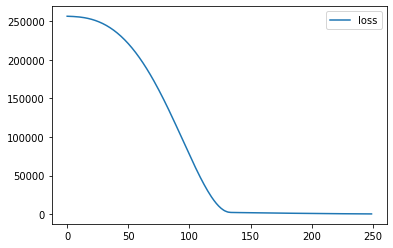

In [ ]:

loss_df.plot()

In [ ]:
model.evaluate(X_test, y_test, verbose=0)

185.38156127929688

In [ ]:
model.evaluate(X_train, y_train, verbose=1)

22/22 [==============================] - 0s 1ms/step - loss: 191.5621


191.5620574951172

In [ ]:
test_pred = model.predict(X_test)

In [ ]:
test_pred

array([[420.27493],
       [609.1313 ],
       [582.38074],
       [563.75305],
       [384.94376],
       [570.467  ],
       [513.4407 ],
       [467.57733],
       [543.9006 ],
       [457.69806],
       [599.0064 ],
       [546.43274],
       [432.0837 ],
       [422.93695],
       [635.04736],
       [448.499  ],
       [511.0879 ],
       [639.0269 ],
       [642.2326 ],
       [559.68384],
       [357.82474],
       [454.37802],
       [399.87054],
       [397.3973 ],
       [559.72504],
       [596.9501 ],
       [529.98126],
       [439.98163],
       [635.63446],
       [428.61395],
       [453.31055],
       [489.36786],
       [449.0782 ],
       [658.74023],
       [438.3393 ],
       [430.21292],
       [505.89154],
       [546.0611 ],
       [509.2143 ],
       [409.9075 ],
       [605.2599 ],
       [430.63123],
       [592.9537 ],
       [456.7893 ],
       [503.91614],
       [574.97125],
       [649.96967],
       [494.6521 ],
       [346.0888 ],
       [489.44186],


In [ ]:
pred_df = pd.DataFrame(y_test, columns=['Real price'])

In [ ]:
test_pred = pd.Series(test_pred.reshape(300))

In [ ]:
pred_df = pd.concat([pred_df,test_pred], axis=1)

In [ ]:
pred_df.columns = ['Real price', 'Predicted price'] 

In [ ]:
pred_df

,Real price,Predicted price
0,402.296319,420.274933
1,624.156198,609.131287
2,582.455066,582.380737
3,578.588606,563.753052
4,371.224104,384.943756
...,...,...
295,525.704657,526.530212
296,502.909473,512.449341
297,612.727910,597.325317
298,417.569725,431.246460


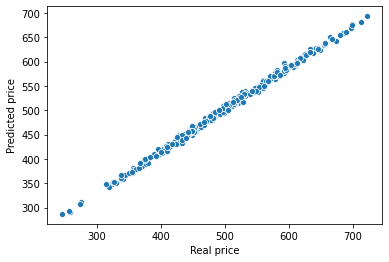

In [ ]:
sns.scatterplot(x='Real price', y='Predicted price', data=pred_df)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mean_absolute_error(pred_df['Real price'], pred_df['Predicted price'])

10.913811313034895